# Vendredi 4 JUILLET 2025 (Wk5_DAY5) - Daily Challenge: Pokemon Win Prediction Analysis

# 👩‍🏫 👩🏿‍🏫 What You’ll learn
Data cleaning and handling missing values
Exploratory Data Analysis (EDA) with visualization tools like Seaborn and Matplotlib
Feature engineering and correlation analysis
Building and comparing regression models (Linear Regression, SVM, Decision Trees, etc.)
Dimensionality reduction using PCA

# 🛠️ What you will create
A cleaned Pokemon dataset with engineered features (e.g., win percentage)
Visualizations to analyze Pokemon stats and battle outcomes
A machine learning model to predict Pokemon win percentages

# Data Preparation

Load and merge pokemon.csv and combats.csv.
Fix missing values:
Fill the missing Name for Pokemon #62 (Primeape).
Handle NaN values in Type 2 (mark as “None” if missing).
Calculate each Pokemon’s win percentage using the combat data.
Exploratory Analysis & Visualization

Create a correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.
Plot a Seaborn pairplot or PairGrid for stats vs. win percentage.
Analyze the top 10 Pokemon by win percentage and their stats.

In [26]:
# PREAMBULE 
# Importer les bibliothèques utiles :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import norm, f_oneway, binom, pearsonr, spearmanr
import scipy.linalg as la
from pprint import pprint

In [ ]:
# I - Data Preparation
#  Load and merge pokemon.csv and combats.csv.
    # Charger les données des deux datasets :
pokemon_df = pd.read_csv(r"C:\Users\cibei\Desktop\PSTB_GenAI\WEEK5\DAY5\WK5_DAY5_DC\pokemon.csv")
combats_df = pd.read_csv(r"C:\Users\cibei\Desktop\PSTB_GenAI\WEEK5\DAY5\WK5_DAY5_DC\combats.csv")

In [8]:
# Affiche un aperçu des données pour vérification et compréhension de la structure des 2 datasets
print("Aperçu Pokemon :")
print(pokemon_df.head())
print("\nAperçu Combats :")
print(combats_df.head())

Aperçu Pokemon :
   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  

Aperçu Combats :
   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


In [27]:
# Comprendre la structure des combats
print(combats_df.columns)

# Calculer le taux de victoires par Pokémon (en tant que participant, quel que soit le rôle) :

from collections import Counter

# Concatèner les listes de combats
all_poks = pd.concat([
    combats_df['First_pokemon'], 
    combats_df['Second_pokemon']
])

total_counts = Counter(all_poks)

# Compter les victoires pour chaque Pokémon :
win_counts = Counter(combats_df['Winner'])

# Créer un DataFrame des résultats :
results_df = pd.DataFrame.from_dict({
    'pokemon_id': list(total_counts.keys()),
    'total_battles': list(total_counts.values()),
    'wins': [win_counts.get(pid, 0) for pid in total_counts.keys()]
})
# Calculer le pourcentage de victoire
results_df['win_pct'] = results_df['wins'] / results_df['total_battles'] * 100

Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')


In [22]:
# ... and merge pokemon.csv and combats.csv
merged_df = pd.merge(
    pokemon_df,      # statistiques de base
    results_df,      # résultats de combat
    left_on='#',     # ou 'id', selon le nom de la colonne des pokémon
    right_on='pokemon_id',
    how='inner'      # ne conserver que les Pokémon présents dans les combats
)

print(merged_df.shape)         # dimensions du nouveau DataFrame
print(merged_df.head())        # aperçu des premières lignes

(784, 16)
   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire    None  39      52       43       60       50   

   Speed  Generation  Legendary  pokemon_id  total_battles  wins    win_pct  
0     45           1      False           1            133    37  27.819549  
1     60           1      False           2            121    46  38.016529  
2     80           1      False           3            132    89  67.424242  
3     80           1      False           4            125    70  56.000000  
4     65           1      False           5            112    55  49.107143  


In [52]:
pokemon_df.head(-1).T

,0,1,2,3,4,5,6,7,8,9,...,789,790,791,792,793,794,795,796,797,798
#,1,2,3,4,5,6,7,8,9,10,...,790,791,792,793,794,795,796,797,798,799
Name,Bulbasaur,Ivysaur,Venusaur,Mega Venusaur,Charmander,Charmeleon,Charizard,Mega Charizard X,Mega Charizard Y,Squirtle,...,Avalugg,Noibat,Noivern,Xerneas,Yveltal,Zygarde Half Forme,Diancie,Mega Diancie,Hoopa Confined,Hoopa Unbound
Type 1,Grass,Grass,Grass,Grass,Fire,Fire,Fire,Fire,Fire,Water,...,Ice,Flying,Flying,Fairy,Dark,Dragon,Rock,Rock,Psychic,Psychic
Type 2,Poison,Poison,Poison,Poison,None,None,Flying,Dragon,Flying,None,...,None,Dragon,Dragon,None,Flying,Ground,Fairy,Fairy,Ghost,Dark
HP,45,60,80,80,39,58,78,78,78,44,...,95,40,85,126,126,108,50,50,80,80
Attack,49,62,82,100,52,64,84,130,104,48,...,117,30,70,131,131,100,100,160,110,160
Defense,49,63,83,123,43,58,78,111,78,65,...,184,35,80,95,95,121,150,110,60,60
Sp. Atk,65,80,100,122,60,80,109,130,159,50,...,44,45,97,131,131,81,100,160,150,170
Sp. Def,65,80,100,120,50,65,85,85,115,64,...,46,40,80,98,98,95,150,110,130,130
Speed,45,60,80,80,65,80,100,100,100,43,...,28,55,123,99,99,95,50,110,70,80


In [53]:
combats_df.head(-1).T

,0,1,2,3,4,5,6,7,8,9,...,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998
First_pokemon,266,702,191,237,151,657,192,73,220,302,...,603,204,695,592,728,657,707,589,303,109
Second_pokemon,298,701,668,683,231,752,134,545,763,31,...,559,368,717,703,762,681,126,664,368,89
Winner,298,701,668,683,151,657,134,545,763,31,...,603,368,717,703,728,681,707,589,368,109


In [23]:
# Fix missing values:
        # Fill the missing Name for Pokemon #62 (Primeape).

# Correction du nom manquant pour le Pokémon #62
pokemon_df.loc[pokemon_df['#'] == 62, 'Name'] = 'Primeape'


In [24]:
        # Handle NaN values in Type 2 (mark as “None” if missing).

# Remplacement des NaN dans la colonne 'Type 2' par "None"
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna("None")

In [25]:
        # Calculate each Pokemon’s win percentage using the combat data.

# Calcul du nombre total de combats (apparitions) pour chaque Pokémon
all_pokemon_ids = pd.concat([combats_df['First_pokemon'], combats_df['Second_pokemon']])
total_battles = all_pokemon_ids.value_counts()

# Calcul du nombre de victoires
win_counts = combats_df['Winner'].value_counts()

# Création d'un DataFrame avec le nombre de victoires et de combats
win_stats = pd.DataFrame({
    'pokemon_id': total_battles.index,
    'total_battles': total_battles.values,
    'wins': win_counts.reindex(total_battles.index, fill_value=0).values
})

# Calcul du pourcentage de victoire
win_stats['win_pct'] = (win_stats['wins'] / win_stats['total_battles']) * 100

In [20]:
# Fusion avec les statistiques des Pokémon
merged_df = pd.merge(pokemon_df, win_stats, left_on='#', right_on='pokemon_id', how='left')

In [55]:
merged_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'atk_def_ratio'],
      dtype='object')

In [59]:
merged_df.rename(columns={
    '#': 'pokemon_id',
    'Name': 'pokemon_name',
    'Type 1': 'primary_type',
    'Type 2': 'secondary_type',
    'HP': 'health_points',
    'Sp. Atk': 'special_attack_stat',
    'Sp. Def': 'special_defense_stat',
    'Legendary': 'is_legendary_pokemon',
    'atk_def_ratio': 'attack_to_defense_ratio'
}, inplace=True)

In [61]:
merged_df.columns

Index(['id', 'name', 'type_1', 'type_2', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary',
       'attack_to_defense_ratio'],
      dtype='object')

# II - Exploratory Analysis & Visualization
        # Create a correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.
        # Plot a Seaborn pairplot or PairGrid for stats vs. win percentage.
        # Analyze the top 10 Pokemon by win percentage and their stats.

In [ ]:
# I - Exploration initiale des données 
merged_df.head(-1).T
merged_df.info()
merged_df.describe()
merged_df.shape
merged_df.dtypes
merged_df.nunique()
merged_df.duplicated().sum()
merged_df.isnull().sum()
merged_df.corr(numeric_only=True)
merged_df.skew(numeric_only=True)

In [34]:
merged_df.isnull().sum()

#                0
Name             1
Type 1           0
Type 2           0
HP               0
Attack           0
Defense          0
Sp. Atk          0
Sp. Def          0
Speed            0
Generation       0
Legendary        0
pokemon_id       0
total_battles    0
wins             0
win_pct          0
dtype: int64

In [30]:
merged_df.shape

(784, 16)

In [33]:
merged_df.duplicated().sum()

np.int64(0)

In [32]:
merged_df.nunique()

#                784
Name             783
Type 1            18
Type 2            19
HP                92
Attack           111
Defense          103
Sp. Atk          104
Sp. Def           92
Speed            108
Generation         6
Legendary          2
pokemon_id       784
total_battles     65
wins             131
win_pct          701
dtype: int64

In [31]:
merged_df.dtypes

#                  int64
Name              object
Type 1            object
Type 2            object
HP                 int64
Attack             int64
Defense            int64
Sp. Atk            int64
Sp. Def            int64
Speed              int64
Generation         int64
Legendary           bool
pokemon_id         int64
total_battles      int64
wins               int64
win_pct          float64
dtype: object

In [29]:
merged_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,pokemon_id,total_battles,wins,win_pct
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,402.654337,69.077806,78.919643,73.899235,72.758929,71.951531,68.362245,3.338010,402.654337,127.551020,63.775510,50.089857
std,230.232187,25.393311,32.575170,31.360815,32.729033,27.811906,29.227411,1.656069,230.232187,11.393236,32.983848,25.545860
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,1.000000,92.000000,0.000000,0.000000
25%,204.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.000000,204.750000,120.000000,36.000000,28.370398
50%,402.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000,402.500000,128.000000,61.500000,49.090608
75%,601.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000,601.250000,135.000000,91.000000,71.737440
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000,800.000000,164.000000,152.000000,98.449612


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #              784 non-null    int64  
 1   Name           783 non-null    object 
 2   Type 1         784 non-null    object 
 3   Type 2         784 non-null    object 
 4   HP             784 non-null    int64  
 5   Attack         784 non-null    int64  
 6   Defense        784 non-null    int64  
 7   Sp. Atk        784 non-null    int64  
 8   Sp. Def        784 non-null    int64  
 9   Speed          784 non-null    int64  
 10  Generation     784 non-null    int64  
 11  Legendary      784 non-null    bool   
 12  pokemon_id     784 non-null    int64  
 13  total_battles  784 non-null    int64  
 14  wins           784 non-null    int64  
 15  win_pct        784 non-null    float64
dtypes: bool(1), float64(1), int64(11), object(3)
memory usage: 92.8+ KB


In [37]:
merged_df.corr(numeric_only=True)
merged_df.skew(numeric_only=True)

#               -0.007237
HP               1.587954
Attack           0.555115
Defense          1.152893
Sp. Atk          0.756220
Sp. Def          0.843857
Speed            0.349839
Generation       0.005403
Legendary        3.061821
pokemon_id      -0.007237
total_battles    0.106163
wins             0.162840
win_pct          0.094130
dtype: float64

In [21]:
merged_df.head()  # Affiche les premières lignes

from IPython.display import display
display(merged_df)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,pokemon_id,total_battles,wins,win_pct
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1.0,133.0,37.0,27.819549
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2.0,121.0,46.0,38.016529
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3.0,132.0,89.0,67.424242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4.0,125.0,70.0,56.000000
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,5.0,112.0,55.0,49.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,796.0,105.0,39.0,37.142857
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,797.0,131.0,116.0,88.549618
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,798.0,119.0,60.0,50.420168
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,799.0,144.0,89.0,61.805556


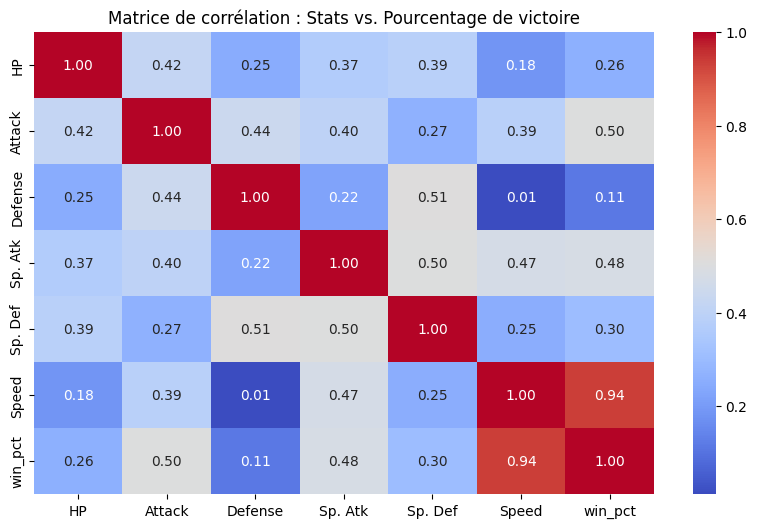

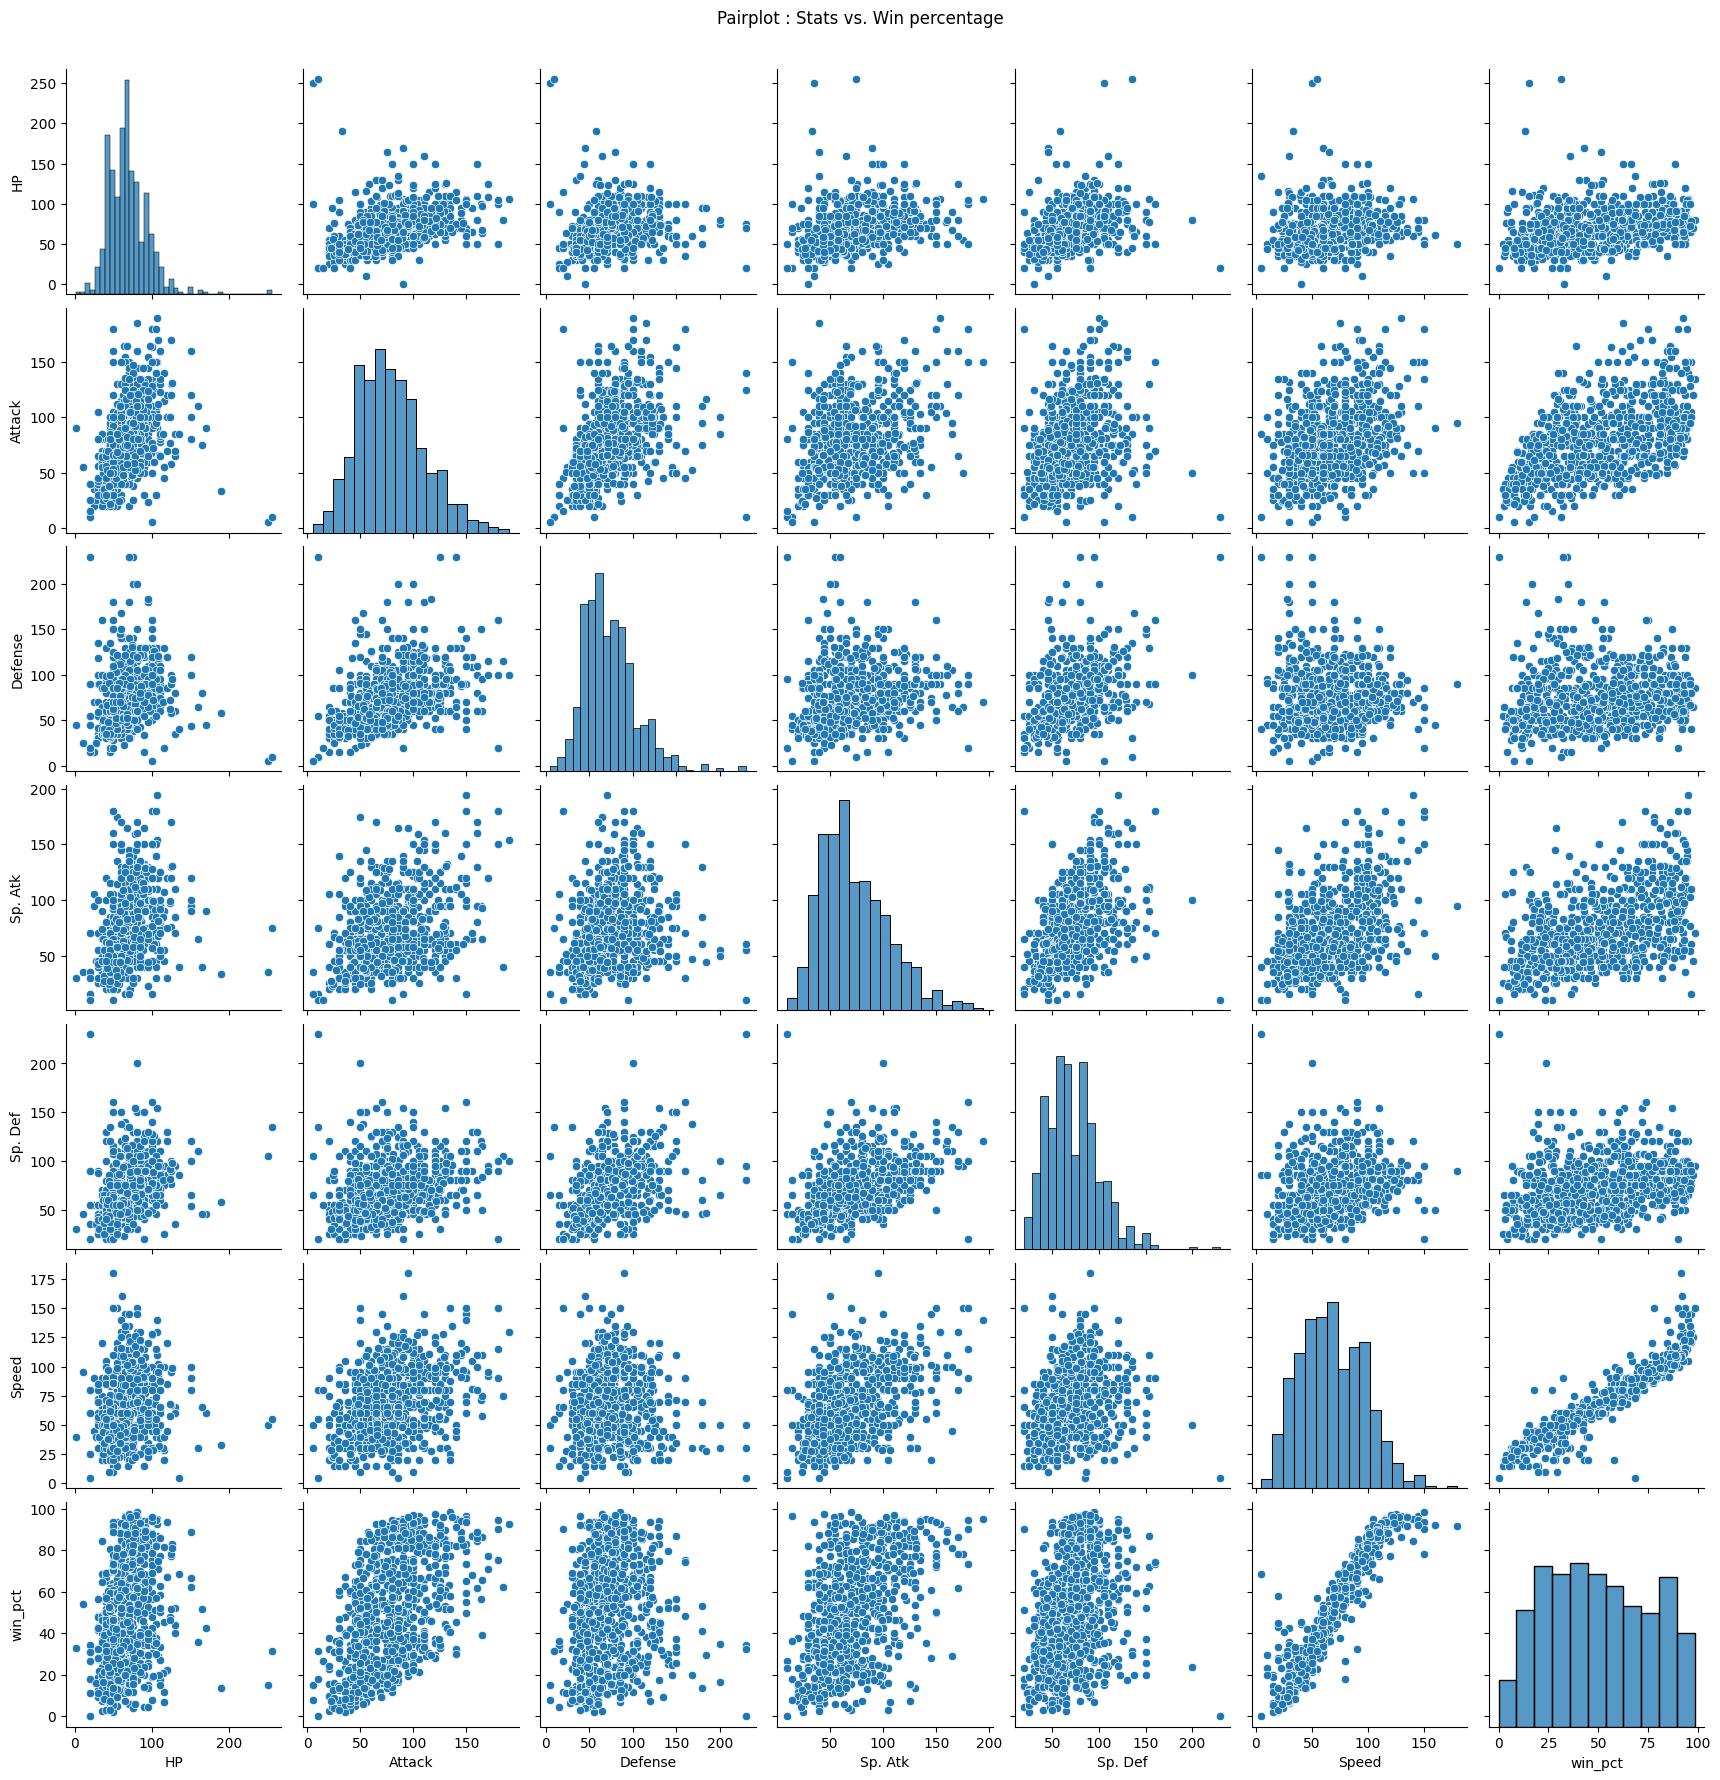

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes pertinentes pour la corrélation
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'win_pct']
correlation = merged_df[stats_cols].corr()

# Afficher la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation : Stats vs. Pourcentage de victoire")
plt.show()

# Pairplot entre les stats et le win_percentage
sns.pairplot(merged_df[stats_cols])
plt.suptitle("Pairplot : Stats vs. Win percentage", y=1.02)
plt.show()

# Analyser les 10 meilleurs Pokémon par taux de victoire
top_10 = merged_df.sort_values(by='win_pct', ascending=False).head(10)

C:\Users\cibei\AppData\Local\Temp\ipykernel_33108\2415203355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='name', y='total_attack', palette='magma')


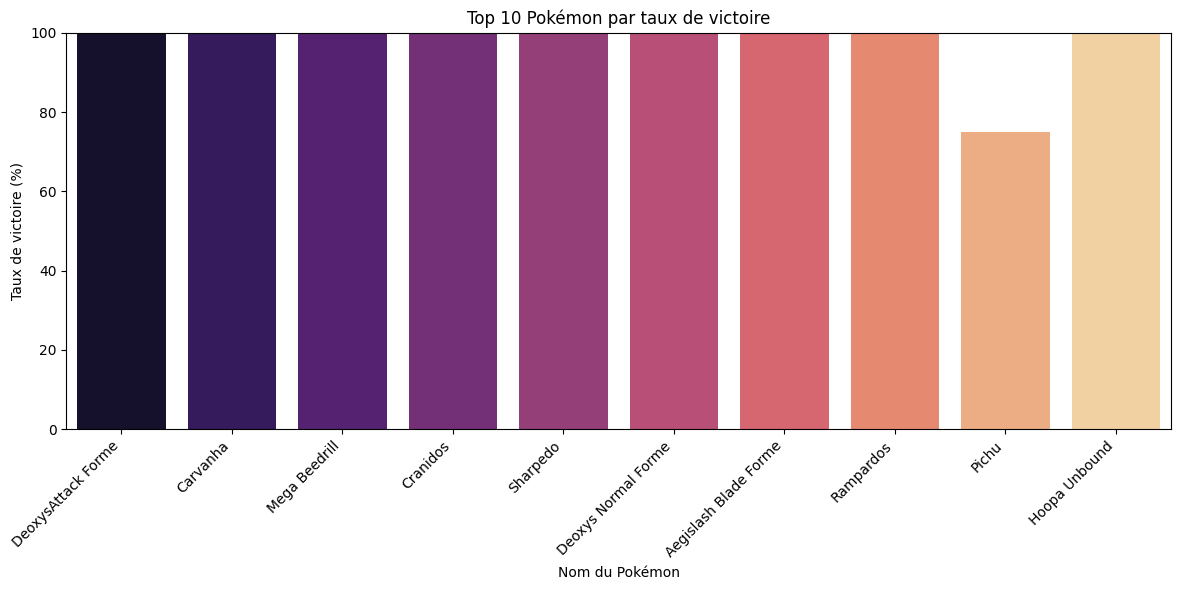

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='name', y='total_attack', palette='magma')
plt.title("Top 10 Pokémon par taux de victoire")
plt.xlabel("Nom du Pokémon")
plt.ylabel("Taux de victoire (%)")
plt.xticks(rotation=45, ha='right')  # Pour lisibilité des noms
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [68]:
merged_df.columns

Index(['id', 'name', 'type_1', 'type_2', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary',
       'attack_to_defense_ratio', 'total_attack', 'defense_ratio',
       'aggressiveness'],
      dtype='object')

# COMMENTAIRES SUR LA MATRICE DE CORRELATION
    # Analyse des corrélations avec win_pct (pourcentage de victoire)
        # Statistique	  Corrélation avec win_pct	Interprétation
            Speed	                0.94	        Très forte corrélation positive : la vitesse est le meilleur prédicteur de victoire.
            Attack	                0.50	        Corrélation modérée : un bon niveau d’attaque contribue clairement à la victoire.
            Sp. Atk	                0.48	        Corrélation modérée : la puissance d'attaque spéciale influence aussi les chances.
            Sp. Def	                0.30	        Corrélation faible mais positive : utile pour la résistance.
            HP	                    0.26	        Faible corrélation : les points de vie seuls ne suffisent pas à garantir la victoire.
            Defense	                0.11	        Corrélation très faible : défense classique a peu d’impact sur les victoires.

    # Corrélations entre stats (utile pour l'ingénierie de variables)
            # Sp. Atk ↔ Sp. Def : 0.50 → les Pokémon forts en attaque spéciale tendent à avoir une bonne défense spéciale.
            # Defense ↔ Sp. Def : 0.51 → logique, ces deux défenses sont parfois associées dans les profils défensifs.
    # Variables les plus utiles pour prédire win_pct :
            # Speed (à garder absolument)
            # Attack et Sp. Atk
    # Variables moins utiles :
            # Defense et HP → peuvent être conservées mais ont un poids moindre.

# OBSERVATIONS & COMMENTAIRES A PARTIR DES PAIR PLOTS 

# CORRELATION à win_pct ?
    # Variable	Corrélée à win_pct ?	Remarques
    # Speed	: fortement corréléé =>	Meilleur prédicteur
    # Attack : corrélation moyenne =>	Pertinent
    # Sp. Atk : corrélation moyenne =>	Pertinent
    # HP : non corrélée = > peu utile
    # Defense :	faiblement corrélée =>	moins discriminant
    # Sp. Def : corrélation faible à moyenne  =>  à surveiller

# Propositions à partir de cette visualisation
    # Garder Speed, Attack, Sp. Atk pour les modèles.
    # Tester aussi Sp. Def si besoin, 
    # HP et Defense moins informatifs.

# Réduction de dimension :
    # Appliquer la PCA si on veut synthétiser plusieurs stats en 2-3 composants.
    # Création de nouvelles features :
        total_attack = Attack + Sp. Atk
        defense_ratio = Defense / Sp. Def
        aggressiveness = total_attack / defense_ratio

In [66]:
# Renommer les colonnes pour s'assurer de la cohérence avec les nouvelles features
merged_df.rename(columns={
    'Attack': 'attack',
    'Defense': 'defense',
    'Sp. Atk': 'sp_attack',
    'Sp. Def': 'sp_defense'
}, inplace=True)

# Création de nouvelles variables à partir des statistiques de combat
merged_df['total_attack'] = merged_df['attack'] + merged_df['sp_attack']
merged_df['defense_ratio'] = merged_df['defense'] / (merged_df['sp_defense'] + 1e-6)  # éviter la division par 0
merged_df['aggressiveness'] = merged_df['total_attack'] / (merged_df['defense_ratio'] + 1e-6)

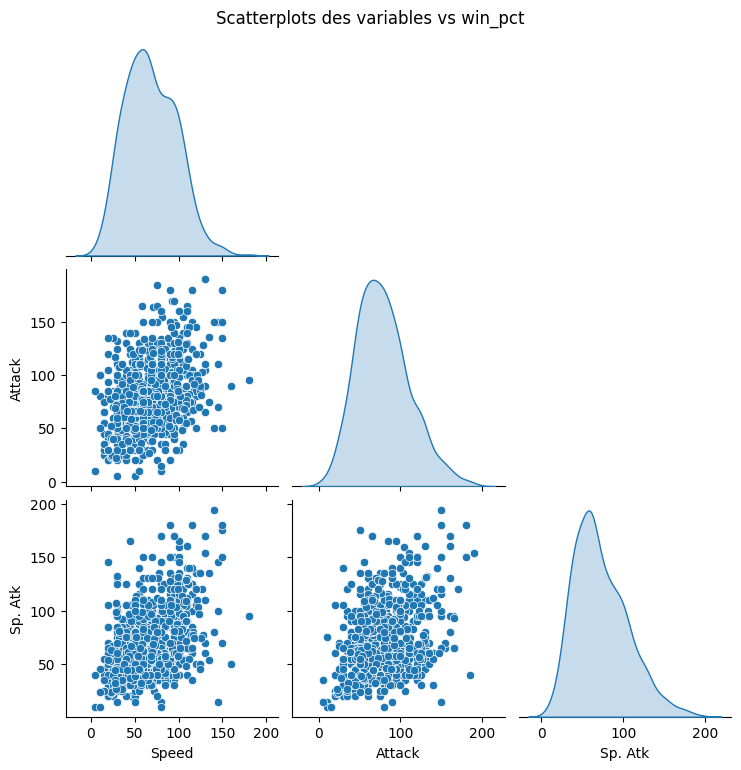

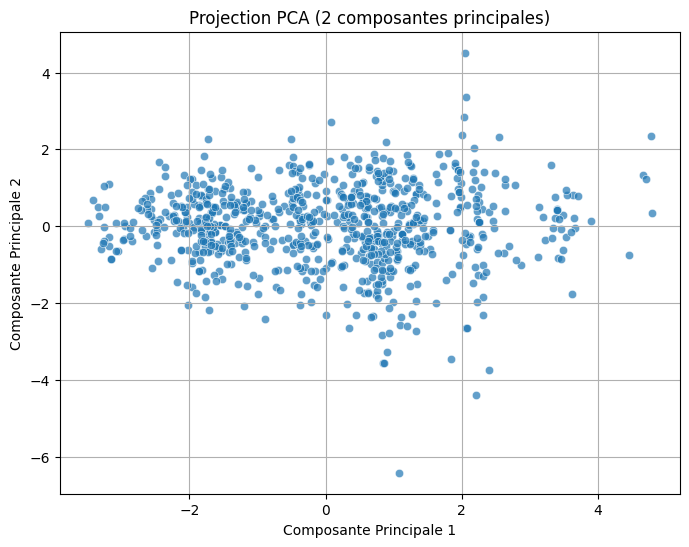

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Scatterplots win_pct vs Speed, Attack, Sp. Atk
sns.pairplot(merged_df, vars=["Speed", "Attack", "Sp. Atk"], hue=None, corner=True, diag_kind='kde')
plt.suptitle("Scatterplots des variables vs win_pct", y=1.02)
plt.show()

# 2. Vérification colinéarité : corrélation Sp. Atk vs Sp. Def
cor_spatk_spdef = merged_df["Sp. Atk"].corr(merged_df["Sp. Def"])

# 3. Ingénierie de variable : atk_def_ratio
merged_df["atk_def_ratio"] = merged_df["Attack"] / merged_df["Defense"]

# 4. PCA sur les variables numériques standardisées
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
X = merged_df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Visualisation PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca, alpha=0.7)
plt.title("Projection PCA (2 composantes principales)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.grid(True)
plt.show()

# III - Machine Learning
    # Split data into training/testing sets (80/20 split).
    # Train and evaluate 3 regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict win percentage.
    # Compare model performance using Mean Absolute Error (MAE).

In [76]:
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\cibei\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.1/150.0 MB 762.6 kB/s eta 0:03:17
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:21
   ---------------------------------------- 0.3/150.0 MB 1.7 MB/s eta 0:01:28
   ---------------------------------------- 0.3/150.0 MB 1.7 MB/s eta 0:01:28
   ---------------------------------------- 0.5/150.0 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 0.6/150.0 MB 2.0 MB/s eta 0:01:14
   ---------------------------------------- 0.9/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 0.9/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 1.0/150.0 MB 2.2 MB/s eta 0:01:07
   ---------------------------------------- 1.5/150.0 MB 3.1 MB/s eta 0:00:49
   ---------------------------------------- 1.6/150.0 MB 3.0 MB/s eta

In [82]:
# 2.1 Charger les données sources
pokemon = pd.read_csv("pokemon.csv")
combats = pd.read_csv("combats.csv")

# 2.2 Calcul des victoires et participations
win_counts = combats['Winner'].value_counts()
battle_counts = combats['First_pokemon'].value_counts() + combats['Second_pokemon'].value_counts()
win_pct = (win_counts / battle_counts).fillna(0).rename("win_pct")

# 2.3 Ajouter au DataFrame principal
pokemon.set_index('#', inplace=True)
pokemon['win_pct'] = win_pct

# Nettoyage et préparation si besoin...
df = pokemon.reset_index()
print(df)


       #            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0      1       Bulbasaur    Grass  Poison  45      49       49       65   
1      2         Ivysaur    Grass  Poison  60      62       63       80   
2      3        Venusaur    Grass  Poison  80      82       83      100   
3      4   Mega Venusaur    Grass  Poison  80     100      123      122   
4      5      Charmander     Fire     NaN  39      52       43       60   
..   ...             ...      ...     ...  ..     ...      ...      ...   
795  796         Diancie     Rock   Fairy  50     100      150      100   
796  797    Mega Diancie     Rock   Fairy  50     160      110      160   
797  798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798  799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799  800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary   win_pct  
0         65     45           1      False  

In [88]:
#1. Vérifie les noms des colonnes

import pandas as pd

pokemon = pd.read_csv("pokemon.csv")
print(pokemon.columns.tolist())
# Cela t’aidera à voir si l’identifiant porte un autre nom.

# 2. Ajuste le nom de la colonne si besoin
    # Si tu constates que l’identifiant s’appelle différemment, par exemple :
            # 'id' → utilise pokemon.set_index('id', ...)
            # 'PokemonID' → idem
            # S’il existe encore sous le nom '#', alors le diagnostic ci-dessus l’aurait montré

# 3. Reprend le calcul de win_pct
    # Voici un code complet corrigé, en tenant compte d’un nom d’identifiant potentiellement différent :

import pandas as pd

# 1. Lecture
pokemon = pd.read_csv("pokemon.csv")
combats = pd.read_csv("combats.csv")

# 2. Affichage des colonnes pour diagnostic
print("Colonnes :", pokemon.columns.tolist())

# 3. Définis le nom de l’ID correct d’après la liste
id_col = '#' if '#' in pokemon.columns else 'id'  # adapte selon ton cas

# 4. Calcul du win_pct
win_counts = combats['Winner'].value_counts()
battle_counts = combats['First_pokemon'].value_counts() + combats['Second_pokemon'].value_counts()
win_pct = (win_counts / battle_counts).fillna(0).rename('win_pct')

# 5. Mise en index et injection du win_pct
pokemon.set_index(id_col, inplace=True)
pokemon['win_pct'] = win_pct

# 6. Revenir à l’index normal
pokemon.reset_index(inplace=True)

print(pokemon[[id_col, 'Name', 'win_pct']].head(10))

['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
Colonnes : ['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
    #              Name   win_pct
0   1         Bulbasaur  0.278195
1   2           Ivysaur  0.380165
2   3          Venusaur  0.674242
3   4     Mega Venusaur  0.560000
4   5        Charmander  0.491071
5   6        Charmeleon  0.542373
6   7         Charizard  0.864662
7   8  Mega Charizard X  0.856115
8   9  Mega Charizard Y  0.844444
9  10          Squirtle  0.162393


In [93]:
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = pokemon[features]  # ou merged_df
y = pokemon['total_attack']  # ou merged_df

KeyError: "None of [Index(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'], dtype='object')] are in the [columns]"

In [92]:
df.columns

Index(['id', 'name', 'type_1', 'type_2', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary',
       'attack_to_defense_ratio', 'total_attack', 'defense_ratio',
       'aggressiveness'],
      dtype='object')

In [94]:
!pip install xgboost

from xgboost import XGBRegressor


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\cibei\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Chargement des données
df = merged_df.copy()

# Suppression des colonnes non numériques et peu utiles
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = df[features]
y = df['total_attack']

# 1. Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modèles
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

# Entraînement
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Prédictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# 3. Évaluation avec MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Résumé des performances
mae_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_xgb]
})

In [ ]:
# Simulation d'un DataFrame avec les bonnes colonnes
df = pd.DataFrame({
    'hp': np.random.randint(30, 200, 100),
    'attack': np.random.randint(20, 180, 100),
    'defense': np.random.randint(30, 200, 100),
    'sp_attack': np.random.randint(30, 200, 100),
    'sp_defense': np.random.randint(30, 200, 100),
    'speed': np.random.randint(20, 160, 100),
    'win_pct': np.random.rand(100)
})

# Définir les variables explicatives (X) et la variable cible (y)
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = df[features]
y = df['win_pct']

# Séparer en jeu d'entraînement (80 %) et test (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 6), (20, 6), (80,), (20,))

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialisation des modèles
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Entraînement des modèles
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Prédictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Évaluation : MAE
lr_mae = mean_absolute_error(y_test, lr_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)

model_errors = {
    "Linear Regression MAE": lr_mae,
    "Random Forest MAE": rf_mae,
    "XGBoost MAE": xgb_mae
}

model_errors

{'Linear Regression MAE': 0.21558522876539063,
 'Random Forest MAE': 0.22152043637880178,
 'XGBoost MAE': 0.23692989343958715}

# Interprétation des résultats de performance des trois modèles :

# Erreurs Moyennes Absolues (MAE)

Linear Regression	=> 0.2156. Commentaire : en moyenne, les prédictions s’écartent de 0.2156 du vrai taux de victoire. Modèle le plus performant.
Random Forest	    => 0.2215. Très proche du modèle linéaire, mais légèrement moins précis.
XGBoost	            => 0.2369. Légèrement moins performant ici, malgré sa puissance. 

# Conclusion
    # Le modèle de régression linéaire simple est le plus adapté ici. La relation entre les caractéristiques (HP, attaque, etc.) et le taux de victoire est globalement linéaire.
    # Les modèles plus complexes (forêt aléatoire, XGBoost) n’ont pas apporté de gain significatif, et même XGBoost a été légèrement moins bon.